<a href="https://www.kaggle.com/code/rifti50/knn-naive-bayes-on-iris-dataset?scriptVersionId=175729569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Contents
*  **[ 1. Plots](#plot)**

*  **[ 2. KNN Model Train](#Model_Train)**

*  **[ 3. Checking various values of Hyper-parameter](#values_of_k)**

*  **[ 4. Spliting Dataset to apply Naive Bayes](#Split)**

*  **[ 5. Calling the Naive Bayers classifiers](#NB)**

*  **[6. Fitting train data to Classifiers](#Fit)**

*  **[ 7. Testing the accuracy of various model](#Test)**

*  **[ 8. Decision](#Decision)**

In [2]:
# Importing necessary libraries 
from sklearn import metrics
import numpy as np # Linear Algebra
import pandas as pd # Handling Data
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

from sklearn.pipeline import Pipeline # Data Pipeline
from sklearn.impute import SimpleImputer # Imputation / Handling missing values
from sklearn.preprocessing import StandardScaler # Scalling data
from sklearn.feature_selection import SelectKBest # Selecting features
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.model_selection import train_test_split # splitting data
from sklearn.ensemble import RandomForestClassifier # Classifier
from sklearn.neighbors import KNeighborsClassifier # Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier # Feature selection
from sklearn.metrics import classification_report, confusion_matrix # Performance Measures
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning
from scipy.stats import randint # Random Integer

import warnings # for mitigating warnings
warnings.filterwarnings('ignore') # same as above

In [3]:
df= pd.read_csv('/kaggle/input/iris/Iris.csv')
df.sample(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
117,118,7.7,3.8,6.7,2.2,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.rename(columns=str.lower,inplace=True)

In [6]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Plot
#### Creating a violinplot to check the differences
The thinner part denotes that there is less density whereas the fatter part shows higher density

<Axes: xlabel='species', ylabel='petalwidthcm'>

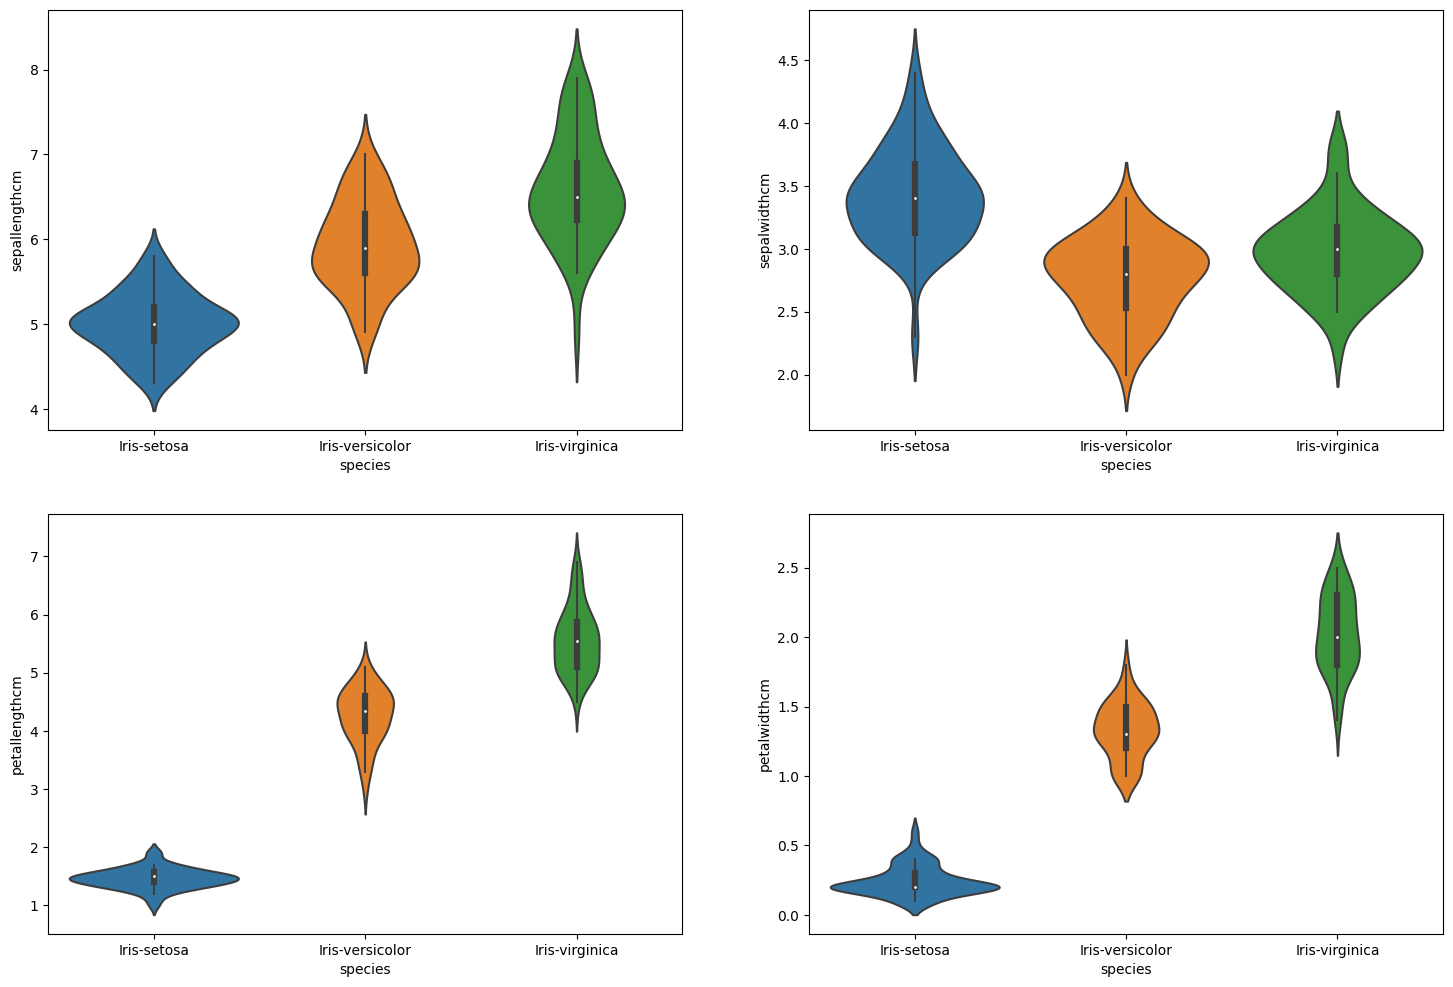

In [7]:
plt.figure(figsize=(18,12)) #plot
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepallengthcm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepalwidthcm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petallengthcm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petalwidthcm',data=df)

### Creating Correlation Heatmap

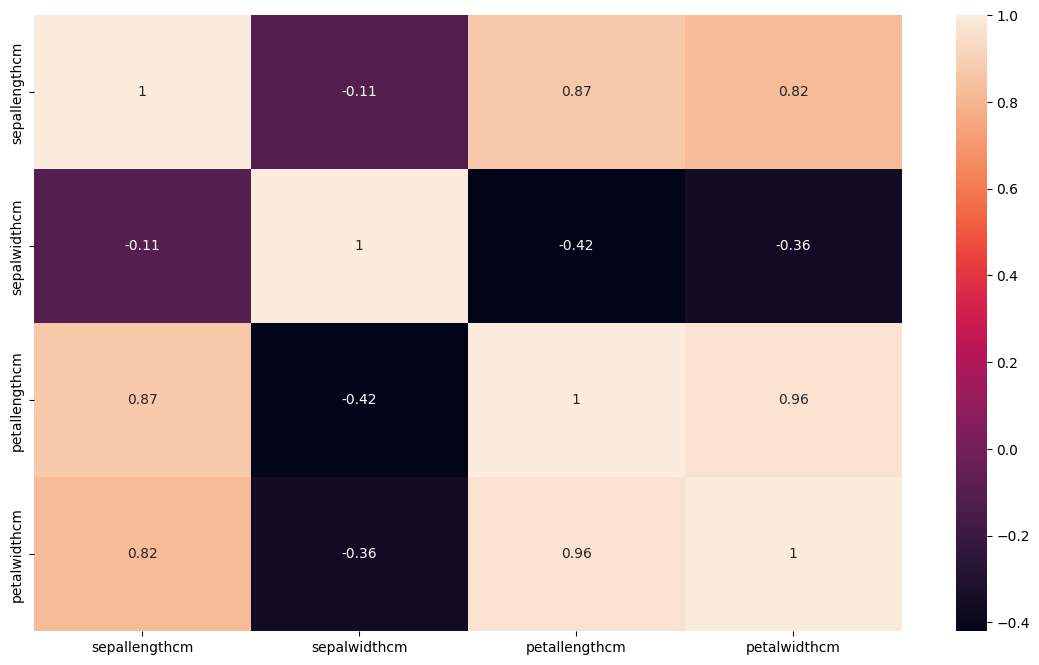

In [8]:
df_corr=df.drop(columns=['species','id'])
plt.figure(figsize=(14,8))
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

## 2. KNN Model Train
#### Let's Train the iris data on KNN model

In [9]:
#Model_Train
traindf_x=df[['sepallengthcm','sepalwidthcm','petallengthcm','petalwidthcm']]
traindf_y=df['species']

In [10]:
model=KNeighborsClassifier(n_neighbors=3) # Value of hyper perameter is 3
model.fit(traindf_x,traindf_y)

KNeighborsClassifier(n_neighbors=3)

In [11]:
prediction=model.predict(traindf_x)
model.score(traindf_x,traindf_y)

0.96

## 3. Checking various values of Hyper-parameter

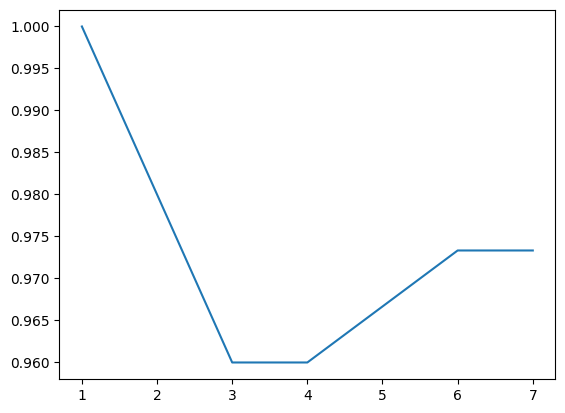

In [12]:
a_index = list(range(1, 8))
accuracy_scores = []  # Initialize an empty list to store accuracy scores
b = [1, 2, 3, 4, 5, 6,7]
for i in list(range(1, 8)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(traindf_x, traindf_y)
    prediction = model.predict(traindf_x)
    accuracy_scores.append(metrics.accuracy_score(prediction, traindf_y))  # Append accuracy scores to the list
a = pd.Series(accuracy_scores)  # Create a series from the list of accuracy scores
plt.plot(a_index, a)
plt.xticks(b)
plt.show()

## 4. Spliting Dataset to apply Naive Bayes

In [13]:
x=traindf_x
y=traindf_y
traindf_x,testdf_x,traindf_y,testdf_y= train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
df.shape #We will split the data into 80-20 section

(150, 6)

In [15]:
print(f"Train data: {traindf_x.shape}\n Test data: {testdf_x.shape}")

Train data: (120, 4)
 Test data: (30, 4)


## 5. Calling the Naive Bayers classifiers

In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [17]:
# Gaussian Naive Bayes
GNB= GaussianNB()
# Multinomial Naive Bayes
MNB= MultinomialNB()
# Bernoulli Naive Bayes
BNB= BernoulliNB()

## 6. Fitting train data to Classifiers

In [18]:
GNB.fit(traindf_x,traindf_y)
MNB.fit(traindf_x,traindf_y)
BNB.fit(traindf_x,traindf_y)

BernoulliNB()

## 7. Testing the accuracy of various model

#### Fitting of GNB model

In [19]:
print(f'Train Accuracy for GNB: {GNB.score(traindf_x,traindf_y)}')
print(f'Test Accuracy for GNB:{GNB.score(testdf_x,testdf_y)}')

Train Accuracy for GNB: 0.95
Test Accuracy for GNB:1.0


#### Fitting of MNB model

In [20]:
print(f'Accuracy for MNB: {MNB.score(traindf_x,traindf_y)}')
print(f'Test Accuracy for MNB:{MNB.score(testdf_x,testdf_y)}')

Accuracy for MNB: 0.95
Test Accuracy for MNB:0.9


#### Fitting of BNB model

In [21]:
print(f'Accuracy for BNB: {BNB.score(traindf_x,traindf_y)}')
print(f'Test Accuracy for BNB:{BNB.score(testdf_x,testdf_y)}')

Accuracy for BNB: 0.3416666666666667
Test Accuracy for BNB:0.3


#### Fitting of KNN model

In [22]:
KNNmodel = KNeighborsClassifier(n_neighbors=3)  # Value of hyperparameter is 3
KNNmodel.fit(traindf_x, traindf_y)
print(f'Accuracy for KNN:{KNNmodel.score(traindf_x, traindf_y)}')
print(f'Test Accuracy for KNN:{KNNmodel.score(testdf_x,testdf_y)}')

Accuracy for KNN:0.95
Test Accuracy for KNN:1.0


## 8. Decision
### What is the suitable model for this DataSet?

#### According to the score of various model we can say that `Multi-nomial Naive Bayes` is the right model for this dataset because of it's discrete values.